## Importing the necessary Libraires

In [1]:
from pandas import read_csv
#!pip install memory_profiler
from memory_profiler import profile
# supresses future warnings 
import warnings                                                 
warnings.simplefilter(action='ignore')

import time
import warnings
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# set plot style
plt.style.use('seaborn-whitegrid')

# Use the magic function to ensure plots render in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

### Importing the Dataset and Preprocessing 

In [2]:
dataset = read_csv("Data_injection_Binary.csv")
X= dataset .iloc[:, :-1].values
X = X.reshape(X.shape[0], X.shape[1], 1)
#X = dataset .iloc[:, :-1].values
Y = dataset .iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
X_train.shape

(14057, 10, 1)

# LSTM 

In [3]:
model1 = Sequential()
model1.add(Conv1D(64, 2, activation="relu", input_shape=(10,1)))
model1.add(Dense(16, activation="relu"))
model1.add(MaxPooling1D())
model1.add(LSTM(100))
model1.add((Flatten()))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='relu'))
#Output layer
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(loss = 'binary_crossentropy', optimizer = "adam",
                   metrics = ['accuracy'])
model1.save('1.h5')
history = model1.fit(X_train, y_train ,validation_data= (X_test,y_test),epochs =10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 64)             192       
                                                                 
 dense (Dense)               (None, 9, 16)             1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 16)            0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               46800     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

ERROR: Could not find file <ipython-input-4-ae60ed66103d>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
110/110 [==============================] - 8s 16ms/step
======Simple LSTM ======
TN : 1657
FP : 118
FN : 251
TP : 1489
 
Prob of Detection     : 85.57
 
Prob of False Alarm   : 6.65
 
Prob of Mis-Detection : 14.43
 
Overall accuracy      : 0.9

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1775
           1       0.93      0.86      0.89      1740

    accuracy                           0.90      3515
   macro avg       0.90      0.89      0.89      3515
weighted avg       0.90      0.90      0.89      3515



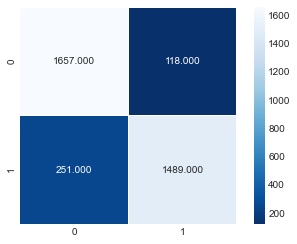

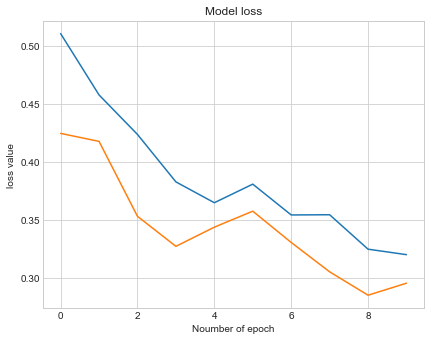

processing time 16.3
training time 8.89
training time per sample 0.0006324251262716084
testing  time 0.0
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183    470.0 MiB    470.0 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185    470.0 MiB      0.0 MiB           1                   prof = get_prof()
  1186    483.5 MiB     13.5 MiB           1                   val = prof(func)(*args, **kwargs)
  1187    483.5 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188    483.5 MiB      0.0 MiB           1                   return val




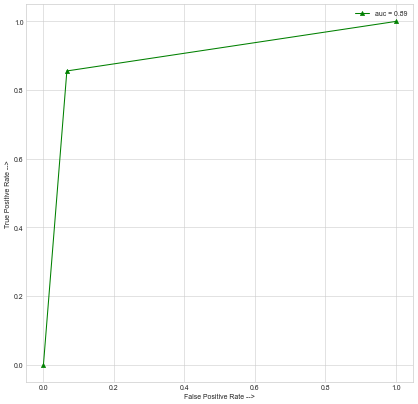

In [4]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    
    
    # metrics calculation
    pred1 = model1.predict(X_test)   
    cm=confusion_matrix(y_test, np.round(pred1))
    cm
    TN, FP, FN, TP = confusion_matrix(y_test, np.round(pred1)).ravel()
    
    
    
    print('======Simple LSTM ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test,np.round(pred1)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history.history['loss']
    val_losses=history.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(y_test,np.round(pred1))
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)



    
if __name__ == '__main__':
    my_func()

# Bidirectional LSTM

In [5]:
from tensorflow.keras.layers import Bidirectional
model2 = Sequential()
model2.add(Conv1D(64, 2, activation="relu", input_shape=(10,1)))
model2.add(Dense(16, activation="relu"))
model2.add(MaxPooling1D())
model2.add(Bidirectional(LSTM(100, activation='relu')))
model2.add((Flatten()))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
#Output layer
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
history2 = model2.fit(X_train, y_train ,validation_data= (X_test,y_test),epochs =10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 9, 64)             192       
                                                                 
 dense_3 (Dense)             (None, 9, 16)             1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 200)              93600     
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)              

ERROR: Could not find file <ipython-input-6-f3e90ec5e9af>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
110/110 [==============================] - 4s 18ms/step
======Bidirectional LSTM ======
TN : 1641
FP : 134
FN : 183
TP : 1557
 
Prob of Detection     : 89.48
 
Prob of False Alarm   : 7.55
 
Prob of Mis-Detection : 10.52
 
Overall accuracy      : 0.91

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1775
           1       0.92      0.89      0.91      1740

    accuracy                           0.91      3515
   macro avg       0.91      0.91      0.91      3515
weighted avg       0.91      0.91      0.91      3515



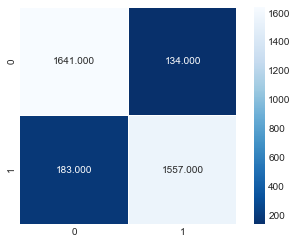

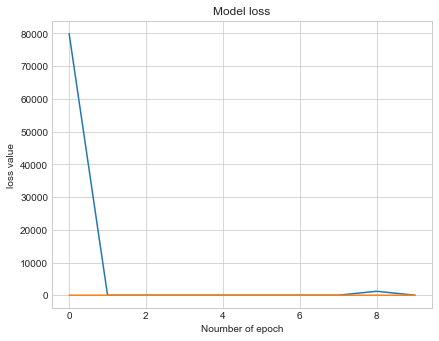

processing time 12.12
training time 4.85
training time per sample 0.0003450238315430035
testing  time 0.01
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183    559.9 MiB    559.9 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185    559.9 MiB      0.0 MiB           1                   prof = get_prof()
  1186    563.6 MiB      3.7 MiB           1                   val = prof(func)(*args, **kwargs)
  1187    563.6 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188    563.6 MiB      0.0 MiB           1                   return val




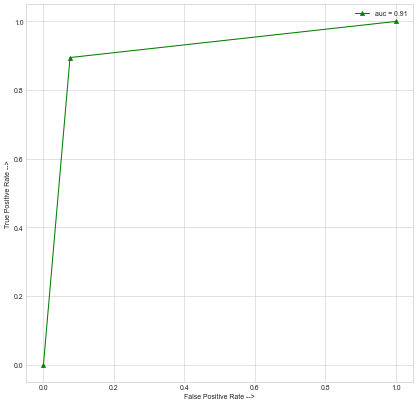

In [6]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    
    
    # metrics calculation
    pred2 = model2.predict(X_test)   
    cm=confusion_matrix(y_test, np.round(pred2))
    cm
    TN, FP, FN, TP = confusion_matrix(y_test, np.round(pred2)).ravel()
    
    
    
    print('======Bidirectional LSTM ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test,np.round(pred2)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history2.history['loss']
    val_losses=history2.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(y_test,np.round(pred2))
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)



    
if __name__ == '__main__':
    my_func()

# GRU 

In [7]:
# load data and arrange into Pandas dataframe
model3 = Sequential()
model3.add(Conv1D(64, 2, activation="relu", input_shape=(10,1)))
model3.add(Dense(16, activation="relu"))
model3.add(MaxPooling1D())
model3.add(GRU(100))
model3.add((Flatten()))
model3.add(Dropout(0.5))
model3.add(Dense(100, activation='relu'))
#Output layer
model3.add(Dense(1, activation='sigmoid'))
model3.summary()
model3.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
history3 = model3.fit(X_train, y_train ,validation_data= (X_test,y_test),epochs =10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 9, 64)             192       
                                                                 
 dense_6 (Dense)             (None, 9, 16)             1040      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 gru (GRU)                   (None, 100)               35400     
                                                                 
 flatten_2 (Flatten)         (None, 100)               0         
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                      

ERROR: Could not find file <ipython-input-8-a51f3c8d4593>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
110/110 [==============================] - 5s 16ms/step
======Simple GRU ======
TN : 1626
FP : 149
FN : 187
TP : 1553
 
Prob of Detection     : 89.25
 
Prob of False Alarm   : 8.39
 
Prob of Mis-Detection : 10.75
 
Overall accuracy      : 0.9

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1775
           1       0.91      0.89      0.90      1740

    accuracy                           0.90      3515
   macro avg       0.90      0.90      0.90      3515
weighted avg       0.90      0.90      0.90      3515



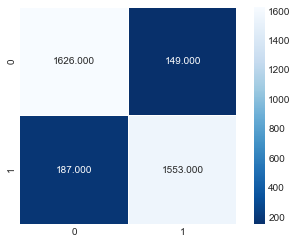

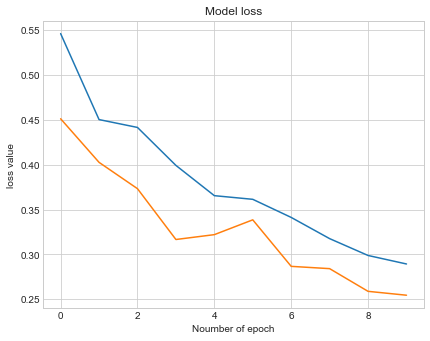

processing time 11.11
training time 5.97
training time per sample 0.0004246994380024187
testing  time 0.0
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183    616.0 MiB    616.0 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185    616.0 MiB      0.0 MiB           1                   prof = get_prof()
  1186    625.3 MiB      9.2 MiB           1                   val = prof(func)(*args, **kwargs)
  1187    625.3 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188    625.3 MiB      0.0 MiB           1                   return val




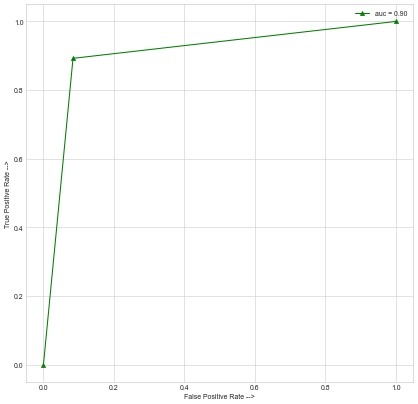

In [8]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    
    
    # metrics calculation
    pred3 = model3.predict(X_test)   
    cm=confusion_matrix(y_test, np.round(pred3))
    cm
    TN, FP, FN, TP = confusion_matrix(y_test, np.round(pred3)).ravel()
    
    
    
    print('======Simple GRU ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test,np.round(pred3)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history3.history['loss']
    val_losses=history3.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(y_test,np.round(pred3))
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)



    
if __name__ == '__main__':
    my_func()

# Bidirectional GRU

In [9]:
from tensorflow.keras.layers import Bidirectional
model4 = Sequential()
model4.add(Conv1D(64, 2, activation="relu", input_shape=(10,1)))
model4.add(Dense(16, activation="relu"))
model4.add(MaxPooling1D())
model4.add(Bidirectional(GRU(100, activation='relu')))
model4.add((Flatten()))
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
#Output layer
model4.add(Dense(1, activation='sigmoid'))
model4.summary()
model4.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
history4 = model4.fit(X_train, y_train ,validation_data= (X_test,y_test),epochs =10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 9, 64)             192       
                                                                 
 dense_9 (Dense)             (None, 9, 16)             1040      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              70800     
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dropout_3 (Dropout)         (None, 200)              

ERROR: Could not find file <ipython-input-10-53c939973657>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
110/110 [==============================] - 6s 18ms/step
======Bidirectional GRU ======
TN : 1590
FP : 185
FN : 203
TP : 1537
 
Prob of Detection     : 88.33
 
Prob of False Alarm   : 10.42
 
Prob of Mis-Detection : 11.67
 
Overall accuracy      : 0.89

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1775
           1       0.89      0.88      0.89      1740

    accuracy                           0.89      3515
   macro avg       0.89      0.89      0.89      3515
weighted avg       0.89      0.89      0.89      3515



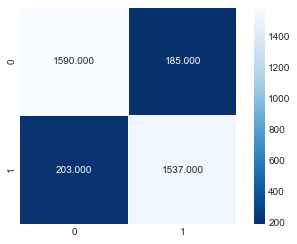

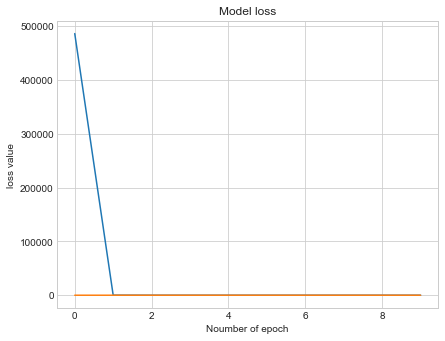

processing time 15.01
training time 7.34
training time per sample 0.0005221597780465249
testing  time 0.0
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183    702.6 MiB    702.6 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185    702.6 MiB      0.0 MiB           1                   prof = get_prof()
  1186    707.6 MiB      5.0 MiB           1                   val = prof(func)(*args, **kwargs)
  1187    707.6 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188    707.6 MiB      0.0 MiB           1                   return val




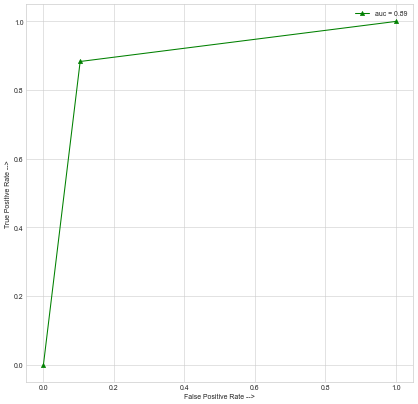

In [10]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    
    
    # metrics calculation
    pred4 = model4.predict(X_test)   
    cm=confusion_matrix(y_test, np.round(pred4))
    cm
    TN, FP, FN, TP = confusion_matrix(y_test, np.round(pred4)).ravel()
    
    
    
    print('======Bidirectional GRU ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test,np.round(pred4)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history4.history['loss']
    val_losses=history4.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(y_test,np.round(pred4))
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)



    
if __name__ == '__main__':
    my_func()

# Simple RNN

In [11]:
from keras import layers
model5 = Sequential()
model5.add(Conv1D(64, 2, activation="relu", input_shape=(10,1)))
model5.add(Dense(16, activation="relu"))
model5.add(MaxPooling1D())
model5.add(layers.SimpleRNN(128))
model5.add((Flatten()))
model5.add(Dropout(0.5))
model5.add(Dense(100, activation='relu'))
#Output layer
model5.add(Dense(1, activation='sigmoid'))
model5.summary()
model5.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
history5 = model5.fit(X_train, y_train ,validation_data= (X_test,y_test),epochs =10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 9, 64)             192       
                                                                 
 dense_12 (Dense)            (None, 9, 16)             1040      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               18560     
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

ERROR: Could not find file <ipython-input-12-a8cb47c25c71>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
110/110 [==============================] - 4s 17ms/step
======Simple RNN ======
TN : 1523
FP : 252
FN : 137
TP : 1603
 
training time : 4.9
Prob of Detection     : 92.13
 
Prob of False Alarm   : 14.2
 
Prob of Mis-Detection : 7.87
 
Overall accuracy      : 0.89

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1775
           1       0.86      0.92      0.89      1740

    accuracy                           0.89      3515
   macro avg       0.89      0.89      0.89      3515
weighted avg       0.89      0.89      0.89      3515



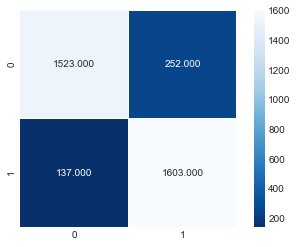

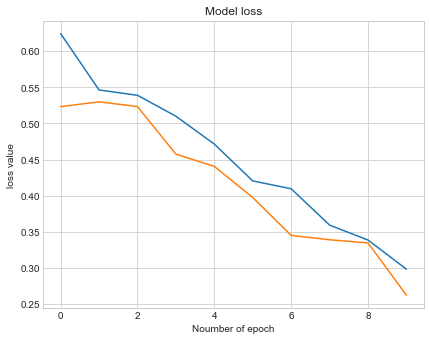

processing time 12.95
training time 4.9
training time per sample 0.0003485807782599417
testing  time 0.0
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183    730.3 MiB    730.3 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185    730.3 MiB      0.0 MiB           1                   prof = get_prof()
  1186    733.5 MiB      3.2 MiB           1                   val = prof(func)(*args, **kwargs)
  1187    733.5 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188    733.5 MiB      0.0 MiB           1                   return val




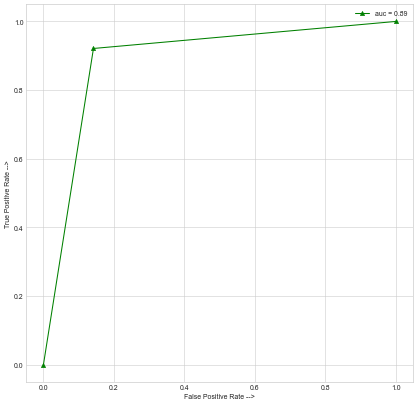

In [12]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    
    
    # metrics calculation
    pred5 = model5.predict(X_test)   
    cm=confusion_matrix(y_test, np.round(pred5))
    cm
    TN, FP, FN, TP = confusion_matrix(y_test, np.round(pred5)).ravel()
    
    
    
    print('======Simple RNN ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)
    print ('training time :',training_time_1)
    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test,np.round(pred5)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history5.history['loss']
    val_losses=history5.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(y_test,np.round(pred5))
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)



    
if __name__ == '__main__':
    my_func()